In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping


2023-12-30 03:13:15.175516: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
def load_and_preprocess_data():
    # Load the dataset
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalize pixel values
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

    # Convert class vectors to binary class matrices
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test


In [3]:
def create_augmentation():
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True
    )
    return datagen


In [4]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model


In [5]:
# Load and preprocess data
x_train, y_train, x_test, y_test = load_and_preprocess_data()


In [6]:
# Create and compile the model
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-12-30 03:13:17.112768: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-30 03:13:17.162591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-30 03:13:17.162749: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-30 03:13:17.163472: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [7]:
# Optional: Data augmentation
datagen = create_augmentation()
datagen.fit(x_train)

In [8]:
# Model checkpoints and early stopping
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
early_stop = EarlyStopping(patience=10)

In [9]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), 
                    epochs=50, 
                    validation_data=(x_test, y_test), 
                    callbacks=[checkpoint, early_stop])


Epoch 1/50


2023-12-30 03:13:18.367212: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8906
2023-12-30 03:13:18.474517: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-30 03:13:18.769494: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


391/391 [==============================] - 16s 38ms/step - loss: 1.8594 - accuracy: 0.3052 - val_loss: 1.5592 - val_accuracy: 0.4234
Epoch 2/50
391/391 [==============================] - 15s 37ms/step - loss: 1.5917 - accuracy: 0.4147 - val_loss: 1.4091 - val_accuracy: 0.4879
Epoch 3/50
391/391 [==============================] - 15s 38ms/step - loss: 1.4835 - accuracy: 0.4664 - val_loss: 1.3869 - val_accuracy: 0.5021
Epoch 4/50
391/391 [==============================] - 14s 37ms/step - loss: 1.4161 - accuracy: 0.4864 - val_loss: 1.2499 - val_accuracy: 0.5558
Epoch 5/50
391/391 [==============================] - 14s 37ms/step - loss: 1.3365 - accuracy: 0.5216 - val_loss: 1.2113 - val_accuracy: 0.5781
Epoch 6/50
391/391 [==============================] - 14s 36ms/step - loss: 1.2964 - accuracy: 0.5337 - val_loss: 1.1522 - val_accuracy: 0.5865
Epoch 7/50
391/391 [==============================] - 15s 38ms/step - loss: 1.2541 - accuracy: 0.5494 - val_loss: 1.1728 - val_accuracy: 0.5848
Epo

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

313/313 [==============================] - 2s 6ms/step - loss: 0.8196 - accuracy: 0.7205
Test accuracy: 0.7204999923706055, Test loss: 0.8195769786834717


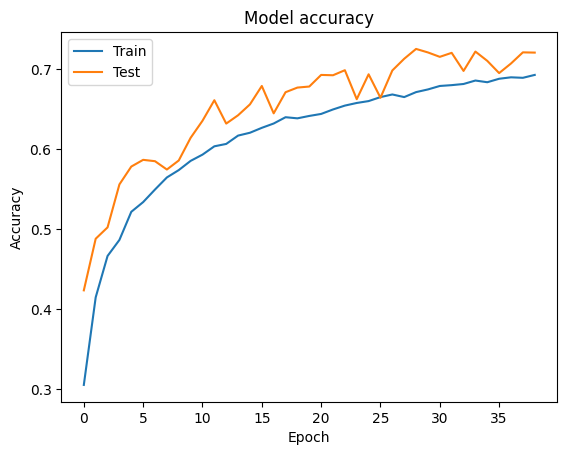

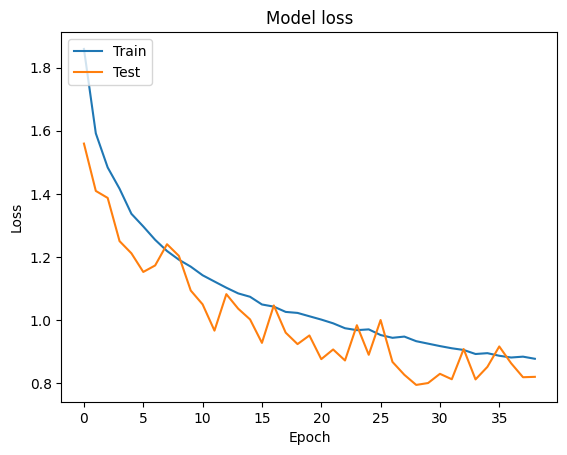

In [12]:
# Check if history object is created
if history is not None:
    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
else:
    print("Training did not complete successfully. No history object was created.")